# 1.多层感知器加入 Dropout 功能以避免过度拟合
为了解决过度拟合的问题，我们在隐藏层增加到1000个神经元并且加入 DropOut 功能。

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

In [4]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [5]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [6]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

#### 修改隐藏层加入 DropOut 功能 

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
model = Sequential()
model.add(Dense(units = 1000,    # 定义“隐藏层”神经元个数为1000
               input_dim = 784, # 设置“输入层”神经元个数为784 
               kernel_initializer = 'normal', # 使用 normal distribution 正态分布的随机数来初始化weight（权重）与bias（偏差）
               activation = 'relu' # 定义激活函数为relu
               ))

In [10]:
model.add(Dropout(0.5))

In [11]:
model.add(Dense(units = 10, # 定义“输出层”神经元个数为10
                kernel_initializer = 'normal',# 使用 normal distribution 正态分布的随机数来初始化weight（权重）与bias（偏差）
                activation = 'softmax' # 定义激活函数为 softmax
               ))

#### 查看模型的摘要

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',metrics = ['accuracy'])

#### 查看训练过程的准确率

In [14]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot,validation_split = 0.2,
                          epochs = 10,batch_size = 200,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3566 - acc: 0.8937 - val_loss: 0.1625 - val_acc: 0.9544
Epoch 2/10
 - 6s - loss: 0.1604 - acc: 0.9535 - val_loss: 0.1171 - val_acc: 0.9654
Epoch 3/10
 - 6s - loss: 0.1166 - acc: 0.9650 - val_loss: 0.0987 - val_acc: 0.9713
Epoch 4/10
 - 6s - loss: 0.0927 - acc: 0.9718 - val_loss: 0.0919 - val_acc: 0.9721
Epoch 5/10
 - 6s - loss: 0.0756 - acc: 0.9770 - val_loss: 0.0818 - val_acc: 0.9762
Epoch 6/10
 - 6s - loss: 0.0623 - acc: 0.9804 - val_loss: 0.0760 - val_acc: 0.9767
Epoch 7/10
 - 6s - loss: 0.0539 - acc: 0.9839 - val_loss: 0.0769 - val_acc: 0.9770
Epoch 8/10
 - 6s - loss: 0.0494 - acc: 0.9847 - val_loss: 0.0737 - val_acc: 0.9783
Epoch 9/10
 - 6s - loss: 0.0431 - acc: 0.9864 - val_loss: 0.0699 - val_acc: 0.9795
Epoch 10/10
 - 6s - loss: 0.0383 - acc: 0.9882 - val_loss: 0.0674 - val_acc: 0.9801


由上图可知，“acc 训练的准确率”与“val_acc 验证的准确率”差距很小，代表已经改善了过度拟合的问题。

#### 图示训练过程的准确率

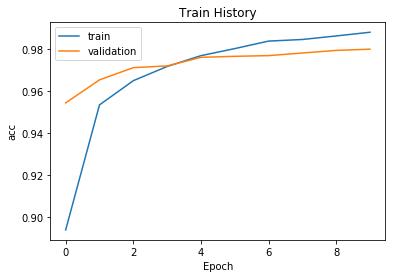

In [15]:
%matplotlib inline 
# 设置matplotlib 在jupyter note 网页内显示图形，如果少了这一指令，就会另打开一个窗口显示图形。
import matplotlib.pyplot as plt
def show_train_history(train_history,
                      train, # 训练数据的执行结果
                      validation # 验证数据的执行结果
                      ):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History') # 显示图的标题
    plt.ylabel(train) # 显示y轴的标签
    plt.xlabel('Epoch') # 设置x轴的标签是‘Epoch’
    plt.legend(['train','validation'],loc='upper left') # 设置图例是显示'train''validation'，位置在左上角
    plt.show()

show_train_history(train_history,'acc','val_acc')

“训练的准确率”与“验证的准确率”差距变小，过度拟合的程度已经减轻。

#### 查看准确率

In [16]:
scores = model.evaluate( # 使用 model.evaluate 评估模型的准确率，评估后的准确率会存储在scores中。
    x_Test_normalize, # 测试数据的features（数字图像的特征值）
    y_Test_OneHot # 测试数据的label（数字图像真实的值）
)
print()
print('accuracy=',scores[1]) # 显示准确率

10000/10000 [==============================] - 1s 66us/step

accuracy= 0.9808


从以上执行结果可知准确率是 0.98 。比之前未加入 DropOut 时还高，这代表加入了DropOut 不但可以解决过度拟合的问题，还可以增加准确率。